In [1]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn 

In [2]:
#load and read dataset
df = pd.read_csv(r'C:\Users\User\Downloads\Student-Employability-Datasets.csv')

print(df) 


     Name of Student  GENERAL APPEARANCE  MANNER OF SPEAKING  \
0          Student 1                   4                   5   
1          Student 2                   4                   4   
2          Student 3                   4                   3   
3          Student 4                   3                   3   
4          Student 5                   4                   4   
...              ...                 ...                 ...   
2977    Student 2996                   4                   3   
2978    Student 2997                   3                   4   
2979    Student 2998                   4                   5   
2980    Student 2999                   4                   4   
2981    Student 3000                   4                   4   

      PHYSICAL CONDITION  MENTAL ALERTNESS  SELF-CONFIDENCE  \
0                      4               5.0                5   
1                      4               4.0                4   
2                      3               3.0

In [3]:
# Data types of each column

print(df.dtypes)
print(df.isnull().sum())


Name of Student                object
GENERAL APPEARANCE              int64
MANNER OF SPEAKING              int64
PHYSICAL CONDITION              int64
MENTAL ALERTNESS              float64
SELF-CONFIDENCE                 int64
ABILITY TO PRESENT IDEAS        int64
COMMUNICATION SKILLS          float64
Student Performance Rating      int64
CLASS                          object
dtype: object
Name of Student                0
GENERAL APPEARANCE             0
MANNER OF SPEAKING             0
PHYSICAL CONDITION             0
MENTAL ALERTNESS              16
SELF-CONFIDENCE                0
ABILITY TO PRESENT IDEAS       0
COMMUNICATION SKILLS          12
Student Performance Rating     0
CLASS                          4
dtype: int64


In [11]:
# Identify columns with missing values
print("Missing values before handling:")
print(df.isnull().sum())



Missing values before handling:
Name of Student                0
GENERAL APPEARANCE             0
MANNER OF SPEAKING             0
PHYSICAL CONDITION             0
MENTAL ALERTNESS              16
SELF-CONFIDENCE                0
ABILITY TO PRESENT IDEAS       0
COMMUNICATION SKILLS          12
Student Performance Rating     0
CLASS                          4
dtype: int64


       Name of Student  GENERAL APPEARANCE  MANNER OF SPEAKING  \
count             2982         2982.000000         2982.000000   
unique            2982                 NaN                 NaN   
top       Student 3000                 NaN                 NaN   
freq                 1                 NaN                 NaN   
mean               NaN            4.246814            3.884641   
std                NaN            0.678501            0.757013   
min                NaN            2.000000            2.000000   
25%                NaN            4.000000            3.000000   
50%                NaN            4.000000            4.000000   
75%                NaN            5.000000            4.000000   
max                NaN            5.000000            5.000000   

        PHYSICAL CONDITION  MENTAL ALERTNESS  SELF-CONFIDENCE  \
count          2982.000000       2966.000000      2982.000000   
unique                 NaN               NaN              NaN   
top         

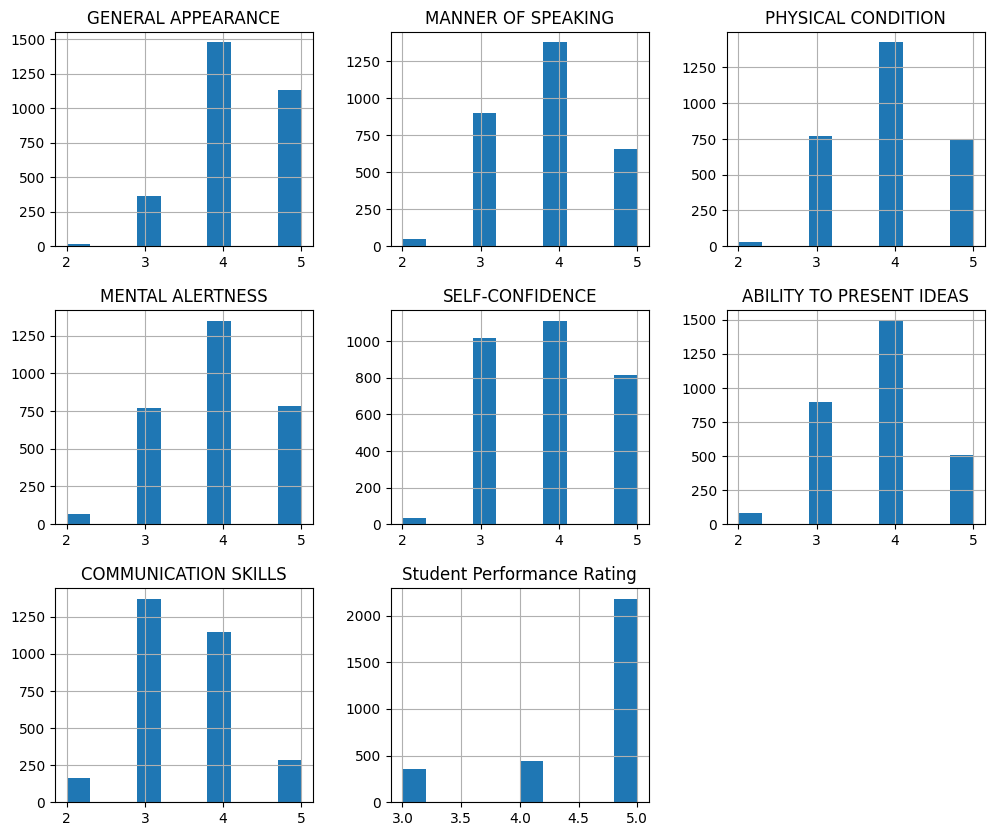

In [4]:
# Descriptive statistics
print(df.describe(include='all'))
df.hist(figsize=(12, 10))
plt.show()

In [5]:
# Drop rows with missing values 
df = pd.read_csv(r'C:\Users\User\Downloads\Student-Employability-Datasets.csv')
df.dropna(subset=['CLASS'], inplace=True)

# Impute missing values 
df['MENTAL ALERTNESS'] = df['MENTAL ALERTNESS'].fillna(df['MENTAL ALERTNESS'].mean())
df['COMMUNICATION SKILLS'] = df['COMMUNICATION SKILLS'].fillna(df['COMMUNICATION SKILLS'].mean())


# Verify that all missing values have been addressed
print("\nMissing values after handling:")
print(df.isnull().sum())


Missing values after handling:
Name of Student               0
GENERAL APPEARANCE            0
MANNER OF SPEAKING            0
PHYSICAL CONDITION            0
MENTAL ALERTNESS              0
SELF-CONFIDENCE               0
ABILITY TO PRESENT IDEAS      0
COMMUNICATION SKILLS          0
Student Performance Rating    0
CLASS                         0
dtype: int64


Numerical columns: ['GENERAL APPEARANCE', 'MANNER OF SPEAKING', 'PHYSICAL CONDITION', 'MENTAL ALERTNESS', 'SELF-CONFIDENCE', 'ABILITY TO PRESENT IDEAS', 'COMMUNICATION SKILLS', 'Student Performance Rating']

Box plots for numerical columns:


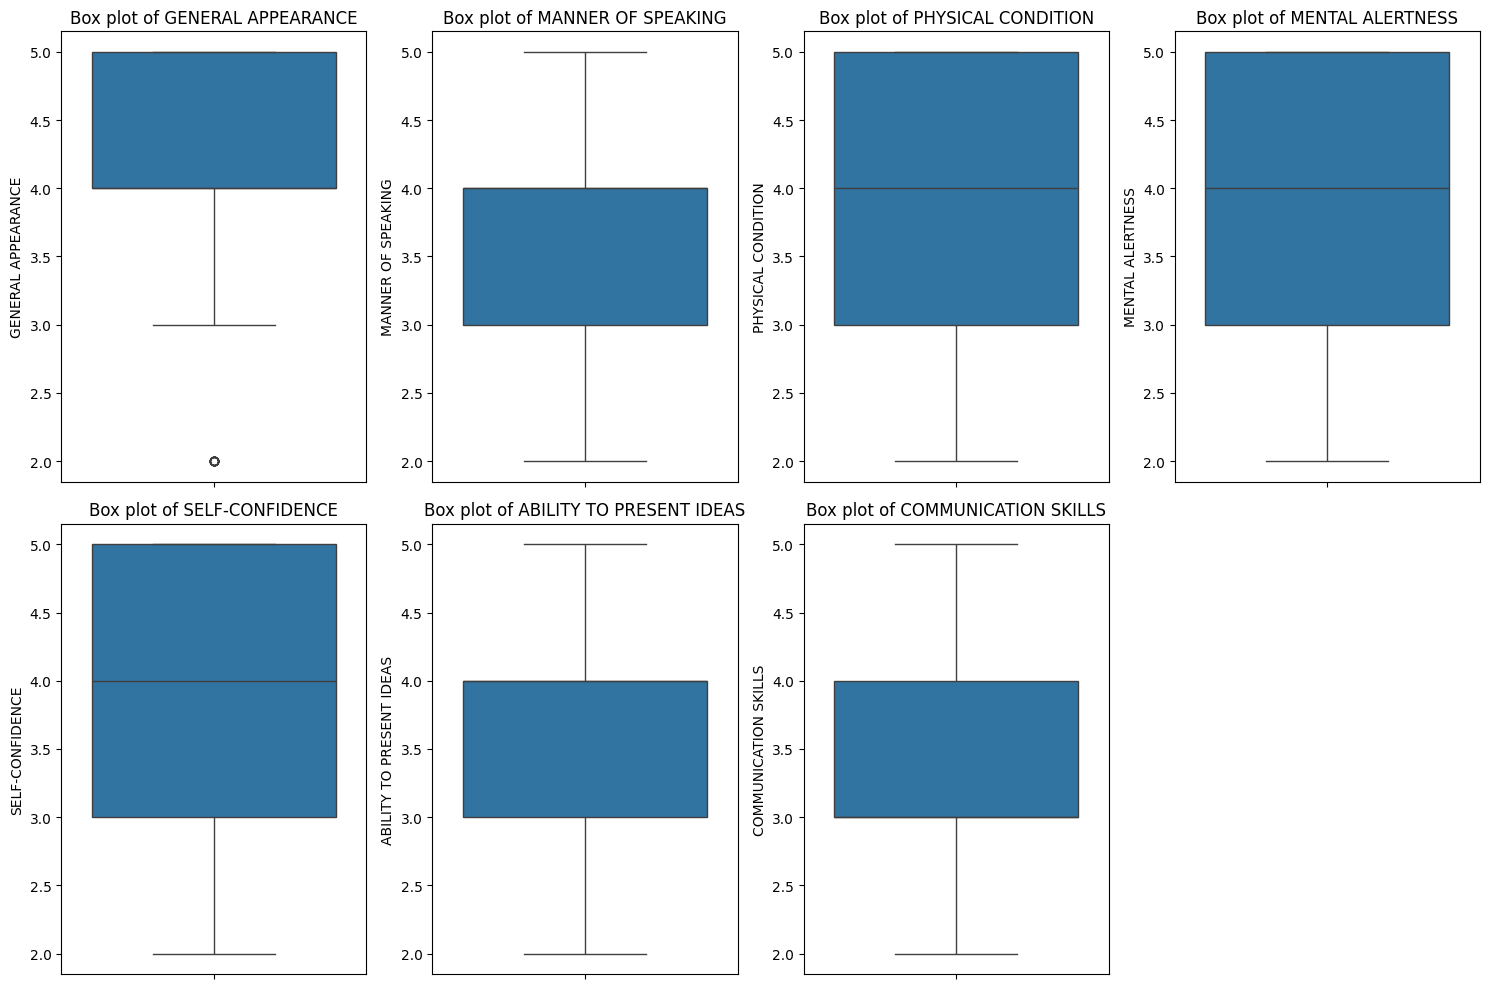

In [6]:
# Identify numerical columns
import seaborn as sns

numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
print("Numerical columns:", numerical_cols)

# Exclude 'Student Performance Rating' as it's likely an outcome variable or categorical
numerical_cols_for_outlier_check = [col for col in numerical_cols if col != 'Student Performance Rating']

# Box plots for numerical column to visualize outliers
print("\nBox plots for numerical columns:")
plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_cols_for_outlier_check):
    plt.subplot(2, 4, i + 1)
    sns.boxplot(y=df[col])
    plt.title(f'Box plot of {col}')
plt.tight_layout()
plt.show()


Distribution of Employability Classes:


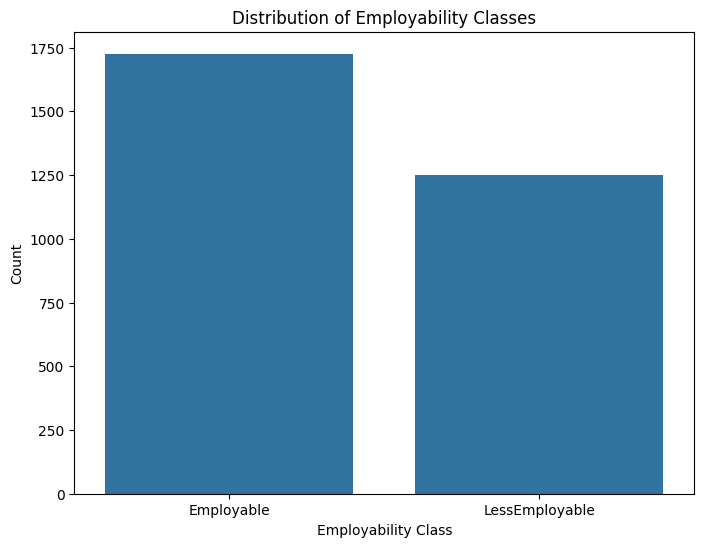


Correlation Heatmap of Numerical Columns:


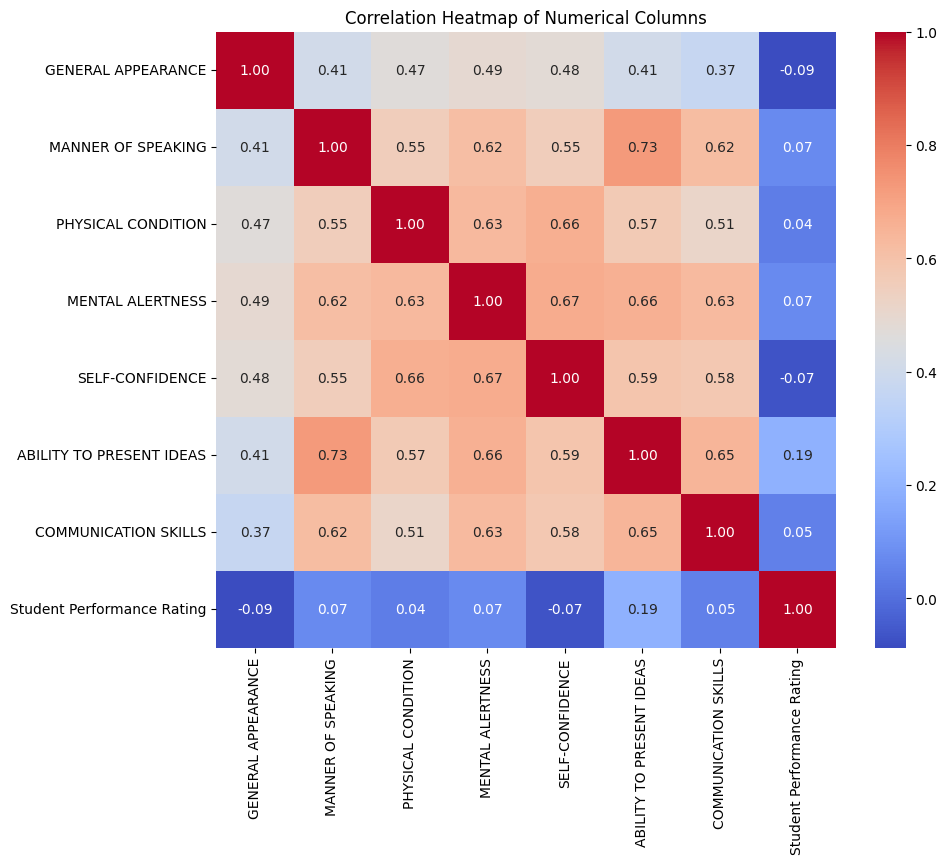


Pie Chart: Distribution of Employability Classes


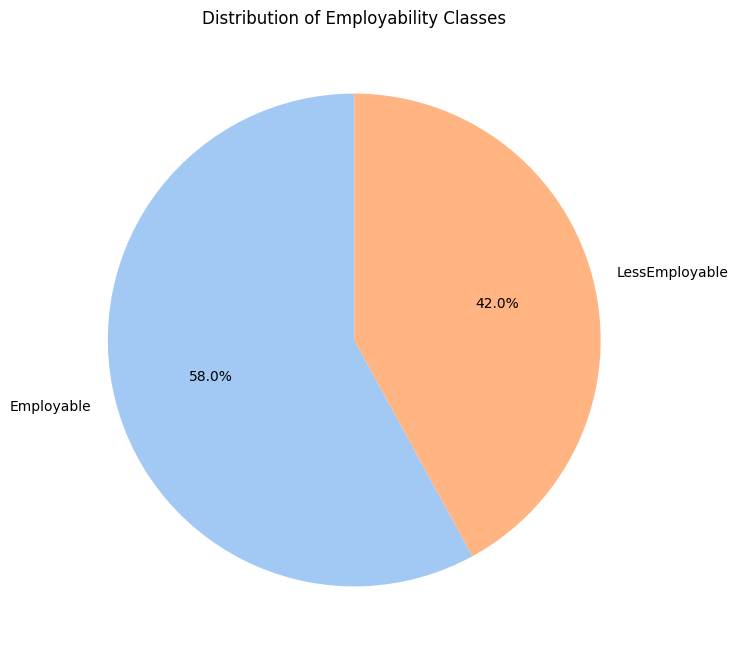


Average Employability Factors by CLASS:


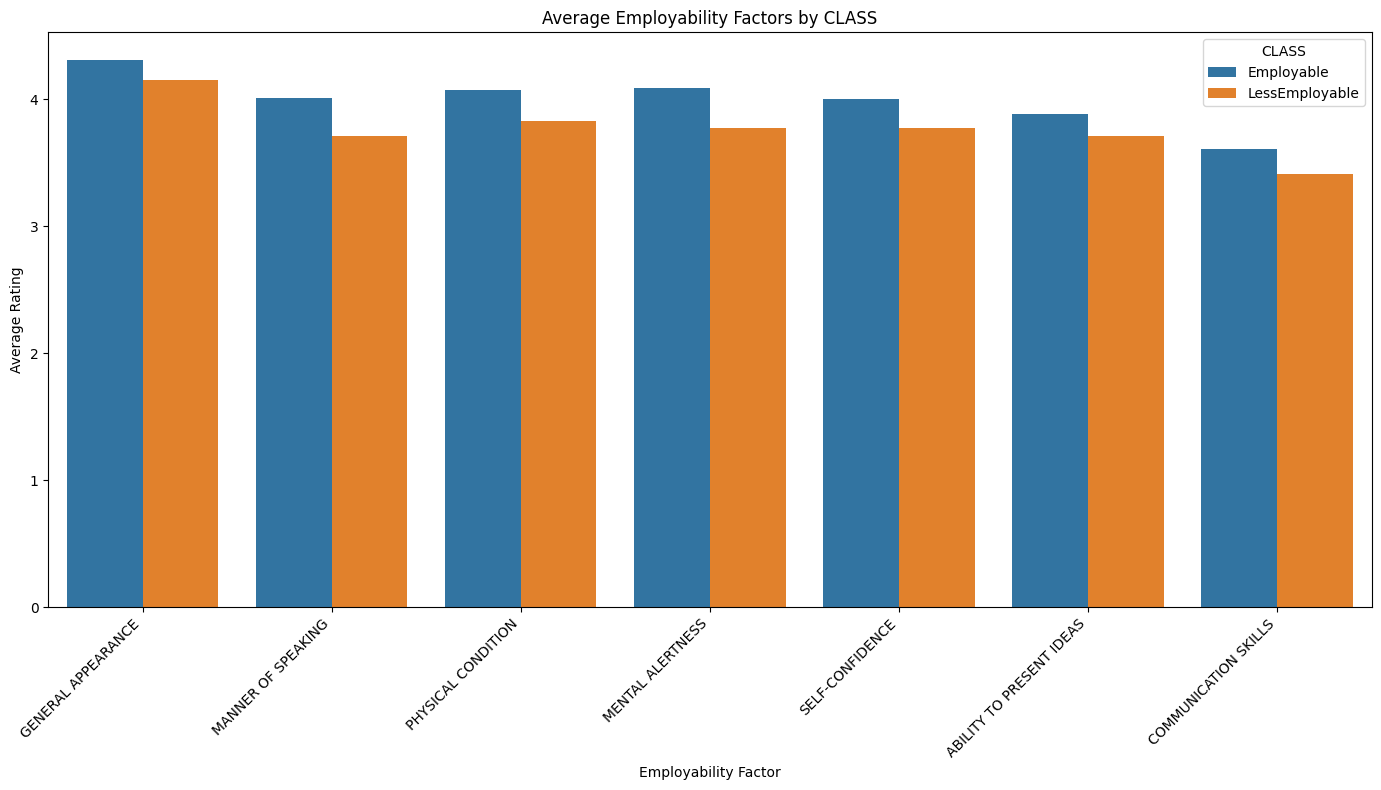

In [13]:
# 4 relevant Visualization
# 1.countplot
print("\nDistribution of Employability Classes:")
plt.figure(figsize=(8, 6))
sns.countplot(x='CLASS', data=df)
plt.title('Distribution of Employability Classes')
plt.xlabel('Employability Class')
plt.ylabel('Count')
plt.show()

# 2. correlation heatmap of the numerical columns
print("\nCorrelation Heatmap of Numerical Columns:")
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns
plt.figure(figsize=(10, 8))
sns.heatmap(df[numerical_cols].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Numerical Columns')
plt.show()

# 3. pie chart of the 'CLASS' column
print("\nPie Chart: Distribution of Employability Classes")
class_counts = df['CLASS'].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(class_counts, labels=class_counts.index, autopct='%1.1f%%', startangle=90, colors=sns.color_palette('pastel'))
plt.title('Distribution of Employability Classes')
plt.show()


# 4.bar chart comparing average employability factors by CLASS
print("\nAverage Employability Factors by CLASS:")
employability_factors = ['GENERAL APPEARANCE', 'MANNER OF SPEAKING', 'PHYSICAL CONDITION',
 'MENTAL ALERTNESS', 'SELF-CONFIDENCE', 'ABILITY TO PRESENT IDEAS','COMMUNICATION SKILLS']
avg_factors_by_class = df.groupby('CLASS')[employability_factors].mean().reset_index()

avg_factors_by_class_melted = avg_factors_by_class.melt(id_vars='CLASS', var_name='Employability Factor', value_name='Average Rating')

plt.figure(figsize=(14, 8))
sns.barplot(x='Employability Factor', y='Average Rating', hue='CLASS', data=avg_factors_by_class_melted)
plt.title('Average Employability Factors by CLASS')
plt.xlabel('Employability Factor')
plt.ylabel('Average Rating')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()